# 1. Introduction : This exercise is to analyze employee's data set. Consider which features affect the employee's attrition (resign or not resign). The report include the introduction,describing the data, visualizations, analysis (include t-test or Mann-whitney for Hypothesis testing) and conclusions.
# Answer 3 questions :
<h1><p>1. What are key factors that are playing into current attrition rates?
<p>2. What are key factors that are playing into current satisfaction rates?
<p>3. When are employees leaving?</h1>

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import rc
import matplotlib.ticker as ticker

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# 2. Describing data set 

In [4]:
data.shape

(1470, 35)

<h1>There are 1407 rows and 35 columns. This sample is large enough for testing.</h1>

In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
pd.set_option('display.max_columns', 500)

In [8]:
data.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# There is no missing or illogical value in the data set.

# Visualization 

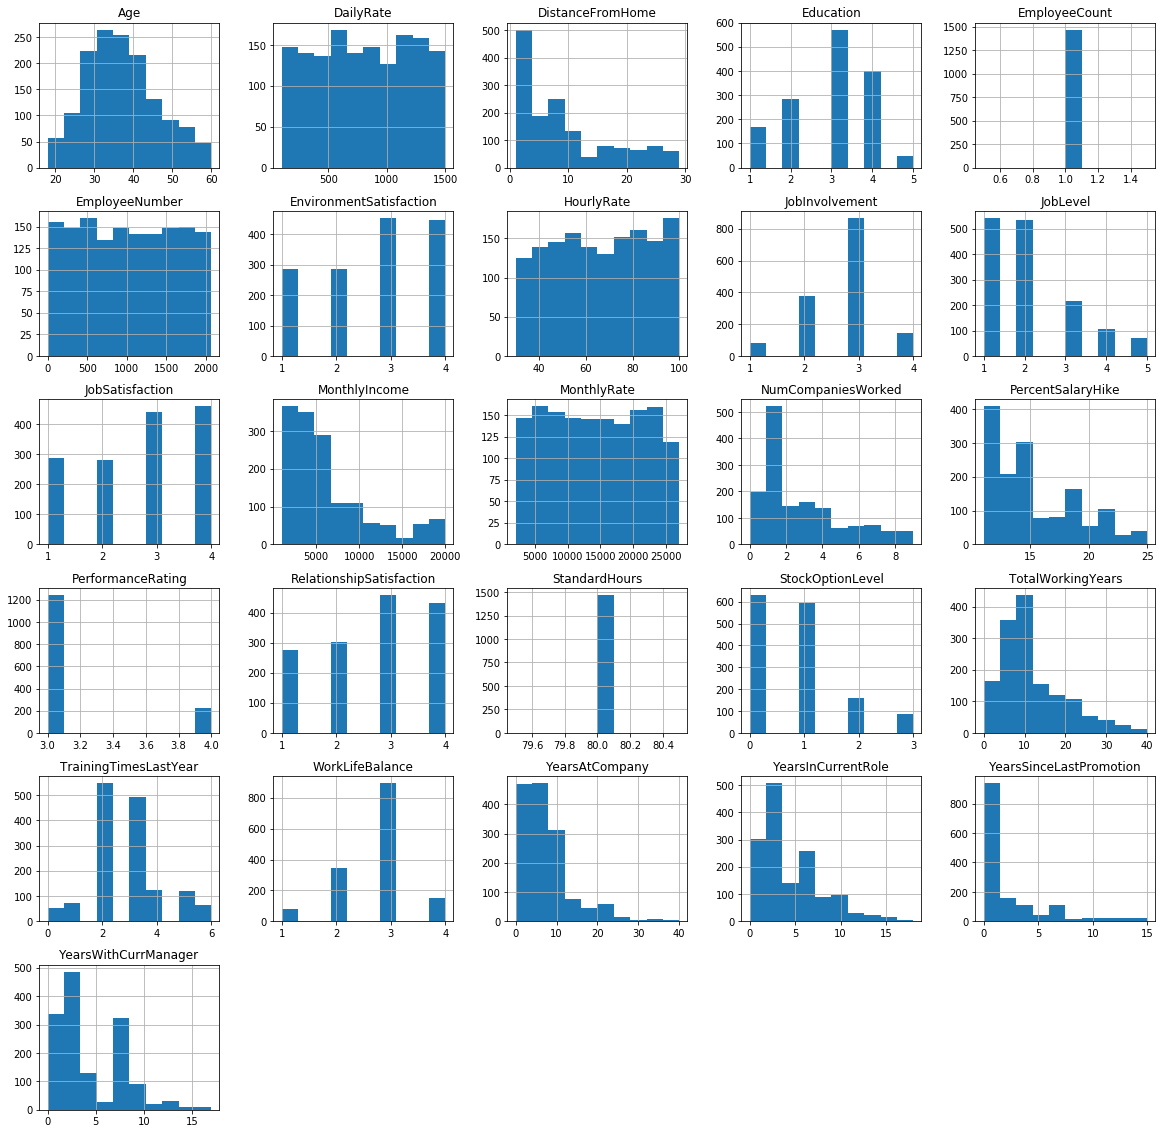

In [10]:
data.hist(figsize=(20,20))
plt.show()

# Some comment : 
<p> Age focus on 30-40.
<p> DistanceFromHome is almost smaller than 10 km. 
<p> Most of employees has Education level at 3,4.
<p> Most of employees worked about 2 companies before.
<p> Total working year focus on 5-10 years.

# Job satisfaction rate

In [11]:
data['JobSatisfaction'].head()

0    4
1    2
2    3
3    3
4    2
Name: JobSatisfaction, dtype: int64

In [12]:
data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [13]:
data['JobSatisfaction'].describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

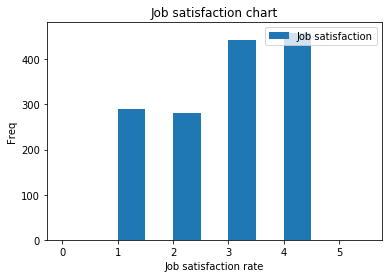

In [14]:
bins_att = np.arange(start=0, stop=6, step=0.5)
plt.hist(data['JobSatisfaction'], bins = bins_att,label=['Job satisfaction'])
plt.title('Job satisfaction chart')
plt.xlabel("Job satisfaction rate")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

# Attrition rate

In [15]:
data['Attrition'].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [16]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [17]:
data_att = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
data_att.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [19]:
data_att.describe()

count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

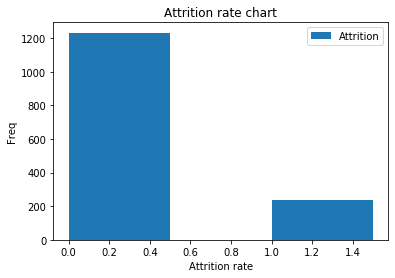

In [20]:
bins_att = np.arange(start=0, stop=2, step=0.5)
plt.hist(data_att, bins = bins_att,label=['Attrition'])
plt.title('Attrition rate chart')
plt.xlabel("Attrition rate")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

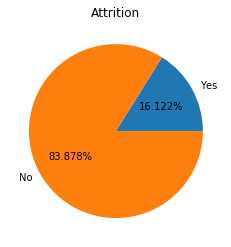

In [21]:
sizes_attrition = [data_att.value_counts()[1], data_att.value_counts()[0]]
plt.pie(sizes_attrition, labels=['Yes', 'No'], autopct='%.3f%%')
plt.title('Attrition')
plt.show

# The number of "No" is so masive. The employees resigned very much.

# 3. What are key factors that are playing into current attrition rates?

# 3.1. Distance from home :

In [22]:
data['DistanceFromHome'].head()

0    1
1    8
2    2
3    3
4    2
Name: DistanceFromHome, dtype: int64

In [23]:
data['DistanceFromHome'].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

In [24]:
data['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

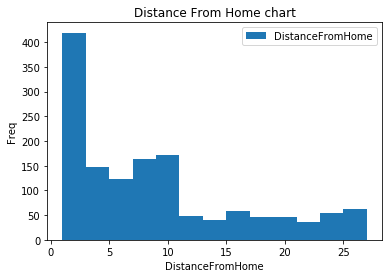

In [25]:
bins_distance = np.arange(start=1, stop=29, step=2)
plt.hist(data['DistanceFromHome'], bins = bins_distance,label=['DistanceFromHome'])
plt.title('Distance From Home chart')
plt.xlabel("DistanceFromHome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

In [26]:
data_f1_attrition1=data[data['Attrition']=='Yes']['DistanceFromHome']

<function matplotlib.pyplot.show(*args, **kw)>

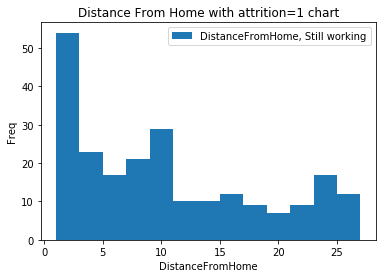

In [27]:
bins_distance = np.arange(start=1, stop=29, step=2)
plt.hist(data_f1_attrition1, bins = bins_distance, label=['DistanceFromHome, Still working'])
plt.title('Distance From Home with attrition=1 chart')
plt.xlabel("DistanceFromHome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

In [28]:
data_f1_attrition0=data[data['Attrition']=="No"]['DistanceFromHome']

<function matplotlib.pyplot.show(*args, **kw)>

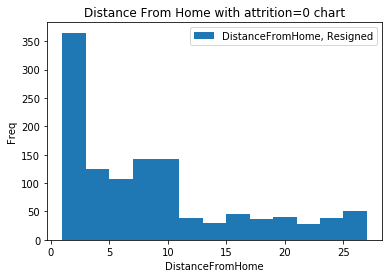

In [29]:
bins_distance = np.arange(start=1, stop=29, step=2)
plt.hist(data_f1_attrition0, bins = bins_distance,label=['DistanceFromHome, Resigned'])
plt.title('Distance From Home with attrition=0 chart')
plt.xlabel("DistanceFromHome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

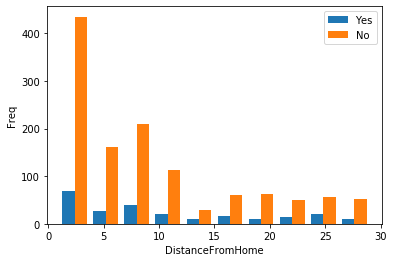

In [30]:
plt.hist([data_f1_attrition1, data_f1_attrition0], label=['Yes', 'No'])
plt.xlabel("DistanceFromHome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show()

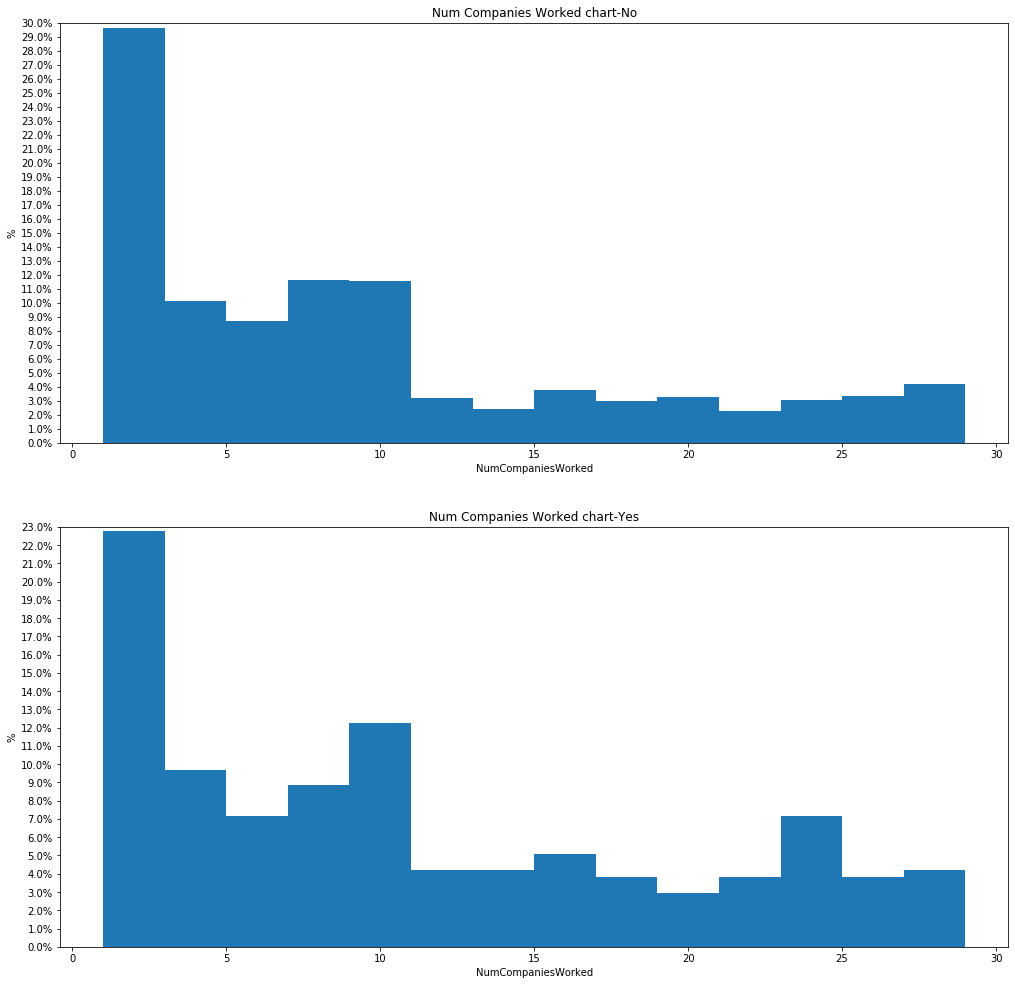

In [103]:
fig, ax = plt.subplots(2,figsize=(17,17))
bins_distance = np.arange(start=1, stop=30, step=2)
width = 0.35  # the width of the bars

y_vals0, x_vals0, e0_ = ax[0].hist(data_f1_attrition0, bins = bins_distance, label=['No'])
ax[0].set_title('Num Companies Worked chart-No')
ax[0].set_xlabel("NumCompaniesWorked")
ax[0].set_ylabel("%")
y_max0 = round((max(y_vals0) / len(data_f1_attrition0)) + 0.01, 2)
ax[0].set_yticks(ticks=np.arange(0.0, y_max0 * len(data_f1_attrition0), 0.01 * len(data_f1_attrition0)))
ax[0].set_ylim(ax[0].get_yticks()[0], ax[0].get_yticks()[-1])
ax[0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data_f1_attrition0)))

y_vals1, x_vals1, e1_ = ax[1].hist(data_f1_attrition1, bins = bins_distance, label=['Yes'])
ax[1].set_title('Num Companies Worked chart-Yes')
ax[1].set_xlabel("NumCompaniesWorked")
ax[1].set_ylabel("%")
y_max1 = round((max(y_vals1) / len(data_f1_attrition1)) + 0.01, 2)
ax[1].set_yticks(ticks=np.arange(0.0, y_max1 * len(data_f1_attrition1), 0.01 * len(data_f1_attrition1)))
ax[1].set_ylim(ax[1].get_yticks()[0], ax[1].get_yticks()[-1])
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data_f1_attrition1)))

plt.show()

# Comment : The total resigned employees in long DistanceFromHome (over 15 km) is higher.

# Hypothesis : The distance from home will impact the attrition rate.

<p><strong>H0</strong> : The distance from home don't impact the attrition rate </p>
<strong>H1</strong> : The distance from home impact the attrition rate.

In [31]:
stats.ttest_1samp(data_f1_attrition1, data['DistanceFromHome'].mean())

Ttest_1sampResult(statistic=2.6234277922535685, pvalue=0.00927233162221968)

In [32]:
print("T-critical value:", stats.t.ppf(1-(0.05/2), len(data_f1_attrition1)-1))

T-critical value: 1.970066853101121


<B>We can see T-statistic > T-critical (2.6234277922535685 > 1.970066853101121). So we reject H0. The Distance from Home will impact the attrition rate. T-stattic is positive. So the higher employees have attrition rate, the farer they go to work.

# 3.2 Total Working Years :

In [33]:
data['TotalWorkingYears'].head()

0     8
1    10
2     7
3     8
4     6
Name: TotalWorkingYears, dtype: int64

In [34]:
data['TotalWorkingYears'].value_counts()

10    202
6     125
8     103
9      96
5      88
1      81
7      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

In [35]:
data['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

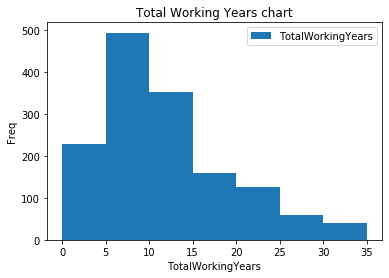

In [36]:
bins_distance = np.arange(start=0, stop=40, step=5)
plt.hist(data['TotalWorkingYears'], bins = bins_distance,label=['TotalWorkingYears'])
plt.title('Total Working Years chart')
plt.xlabel("TotalWorkingYears")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

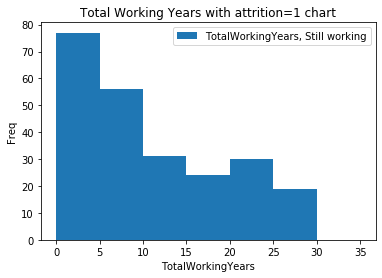

In [37]:
data_f2_attrition1=data[data['Attrition']=='Yes']['TotalWorkingYears']
bins_distance = np.arange(start=0, stop=40, step=5)
plt.hist(data_f1_attrition1, bins = bins_distance, label=['TotalWorkingYears, Still working'])
plt.title('Total Working Years with attrition=1 chart')
plt.xlabel("TotalWorkingYears")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

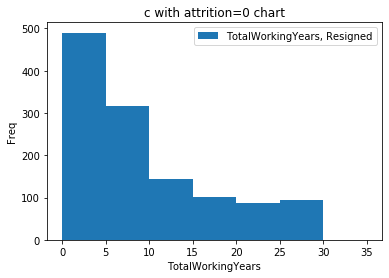

In [38]:
data_f2_attrition0=data[data['Attrition']=="No"]['TotalWorkingYears']
bins_distance = np.arange(start=0, stop=40, step=5)
plt.hist(data_f1_attrition0, bins = bins_distance,label=['TotalWorkingYears, Resigned'])
plt.title('c with attrition=0 chart')
plt.xlabel("TotalWorkingYears")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

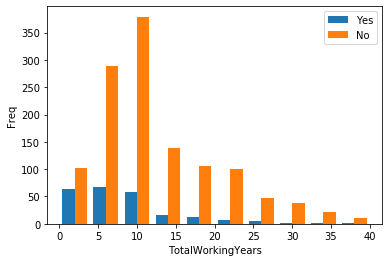

In [39]:
plt.hist([data_f2_attrition1, data_f2_attrition0], label=['Yes', 'No'])
plt.xlabel("TotalWorkingYears")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show()

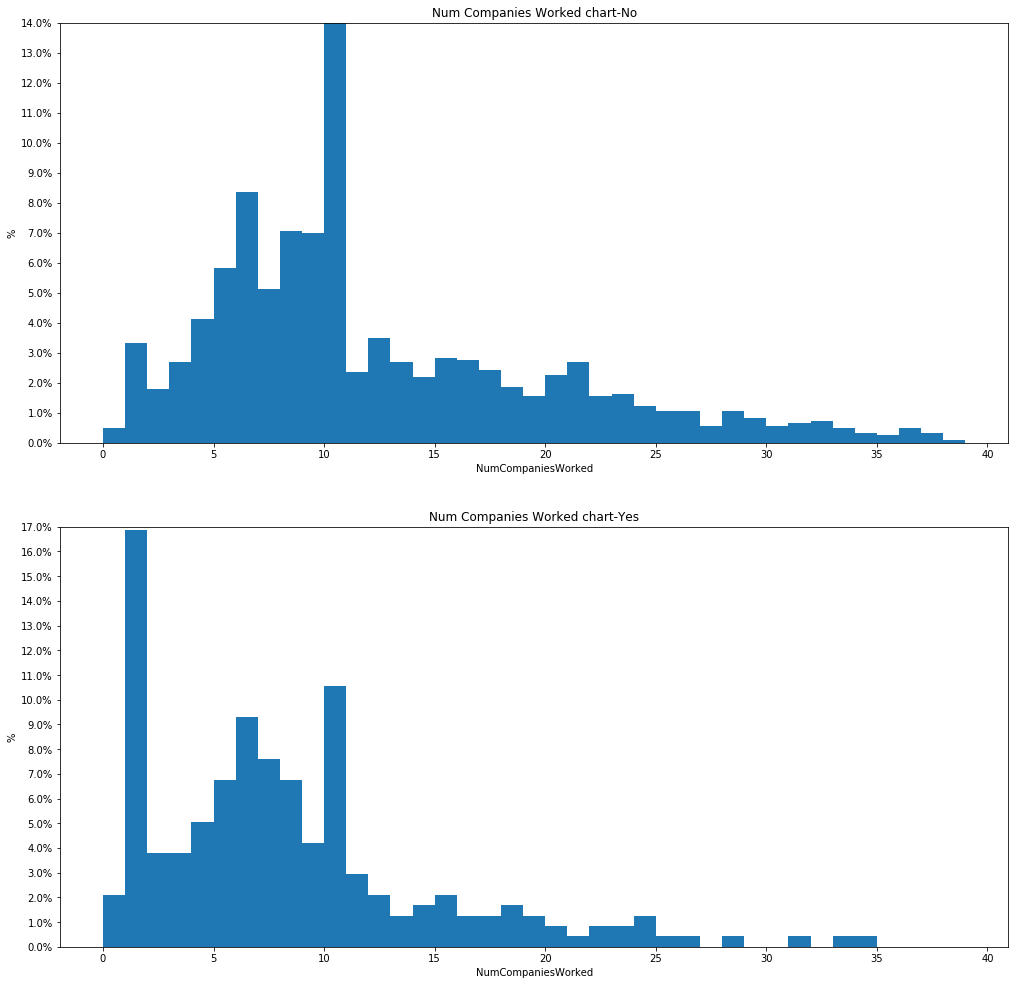

In [100]:
fig, ax = plt.subplots(2,figsize=(17,17))
bins_distance = np.arange(start=0, stop=40, step=1)
width = 0.35  # the width of the bars

y_vals0, x_vals0, e0_ = ax[0].hist(data_f2_attrition0, bins = bins_distance, label=['No'])
ax[0].set_title('Num Companies Worked chart-No')
ax[0].set_xlabel("NumCompaniesWorked")
ax[0].set_ylabel("%")
y_max0 = round((max(y_vals0) / len(data_f2_attrition0)) + 0.01, 2)
ax[0].set_yticks(ticks=np.arange(0.0, y_max0 * len(data_f2_attrition0), 0.01 * len(data_f2_attrition0)))
ax[0].set_ylim(ax[0].get_yticks()[0], ax[0].get_yticks()[-1])
ax[0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data_f2_attrition0)))

y_vals1, x_vals1, e1_ = ax[1].hist(data_f2_attrition1, bins = bins_distance, label=['Yes'])
ax[1].set_title('Num Companies Worked chart-Yes')
ax[1].set_xlabel("NumCompaniesWorked")
ax[1].set_ylabel("%")
y_max1 = round((max(y_vals1) / len(data_f2_attrition1)) + 0.01, 2)
ax[1].set_yticks(ticks=np.arange(0.0, y_max1 * len(data_f2_attrition1), 0.01 * len(data_f2_attrition1)))
ax[1].set_ylim(ax[1].get_yticks()[0], ax[1].get_yticks()[-1])
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data_f2_attrition1)))

plt.show()

# We can see the strange with value smaller 5 working years between yes and no. Value smaller 5 working years of "Yes" is high.

# Hypothesis : The total working years will impact the attrition rate.

<p><strong>H0</strong> : The total working years don't impact the attrition rate </p>
<strong>H1</strong> : The total working years impact the attrition rate.

In [40]:
stats.ttest_1samp(data_f2_attrition1, data['TotalWorkingYears'].mean())

Ttest_1sampResult(statistic=-6.516925900360393, pvalue=4.2999495770726643e-10)

In [41]:
print("T-critical value:", stats.t.ppf(1-(0.05/2), len(data_f2_attrition1)-1))

T-critical value: 1.970066853101121


<B>We can see |T-statistic| > |T-critical| (6.516925900360393 > 1.970066853101121). 
So we reject H0. The total working year will impact the attrition rate. T-stattic is negative. So the higher employees have attrition rate, the shorter year they work in the industry.

# 3.3. Monthly Income :

In [42]:
data['MonthlyIncome'].head()

0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int64

In [43]:
data['MonthlyIncome'].value_counts()

2342     4
5562     3
2741     3
2451     3
2610     3
2380     3
6142     3
6347     3
2559     3
2404     3
3452     3
5769     2
3420     2
6397     2
4306     2
2743     2
3760     2
2720     2
4779     2
4284     2
5238     2
5228     2
2269     2
2996     2
9980     2
2782     2
5204     2
5993     2
4197     2
7756     2
        ..
3743     1
13582    1
7457     1
13603    1
11557    1
1081     1
5415     1
5486     1
13610    1
7441     1
10851    1
19701    1
5376     1
11510    1
3319     1
5368     1
1274     1
17169    1
3491     1
2011     1
1281     1
3375     1
13570    1
8564     1
7428     1
5381     1
13577    1
12965    1
3339     1
14336    1
Name: MonthlyIncome, Length: 1349, dtype: int64

In [44]:
data['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

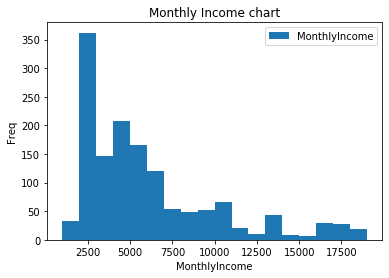

In [45]:
bins_distance = np.arange(start=1000, stop=20000, step=1000)
plt.hist(data['MonthlyIncome'], bins = bins_distance,label=['MonthlyIncome'])
plt.title('Monthly Income chart')
plt.xlabel("MonthlyIncome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

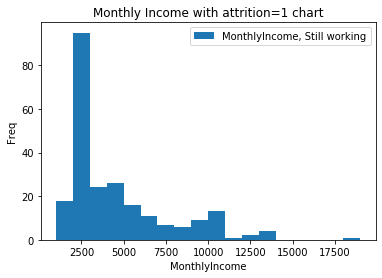

In [46]:
data_f3_attrition1=data[data['Attrition']=='Yes']['MonthlyIncome']
bins_distance = np.arange(start=1000, stop=20000, step=1000)
plt.hist(data_f3_attrition1, bins = bins_distance, label=['MonthlyIncome, Still working'])
plt.title('Monthly Income with attrition=1 chart')
plt.xlabel("MonthlyIncome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

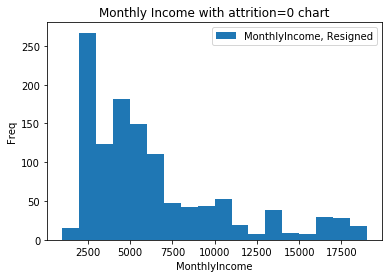

In [47]:
data_f3_attrition0=data[data['Attrition']=='No']['MonthlyIncome']
bins_distance = np.arange(start=1000, stop=20000, step=1000)
plt.hist(data_f3_attrition0, bins = bins_distance, label=['MonthlyIncome, Resigned'])
plt.title('Monthly Income with attrition=0 chart')
plt.xlabel("MonthlyIncome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

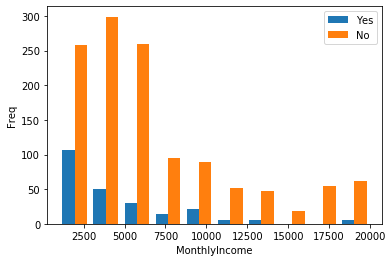

In [48]:
plt.hist([data_f3_attrition1, data_f3_attrition0], label=['Yes', 'No'])
plt.xlabel("MonthlyIncome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show()

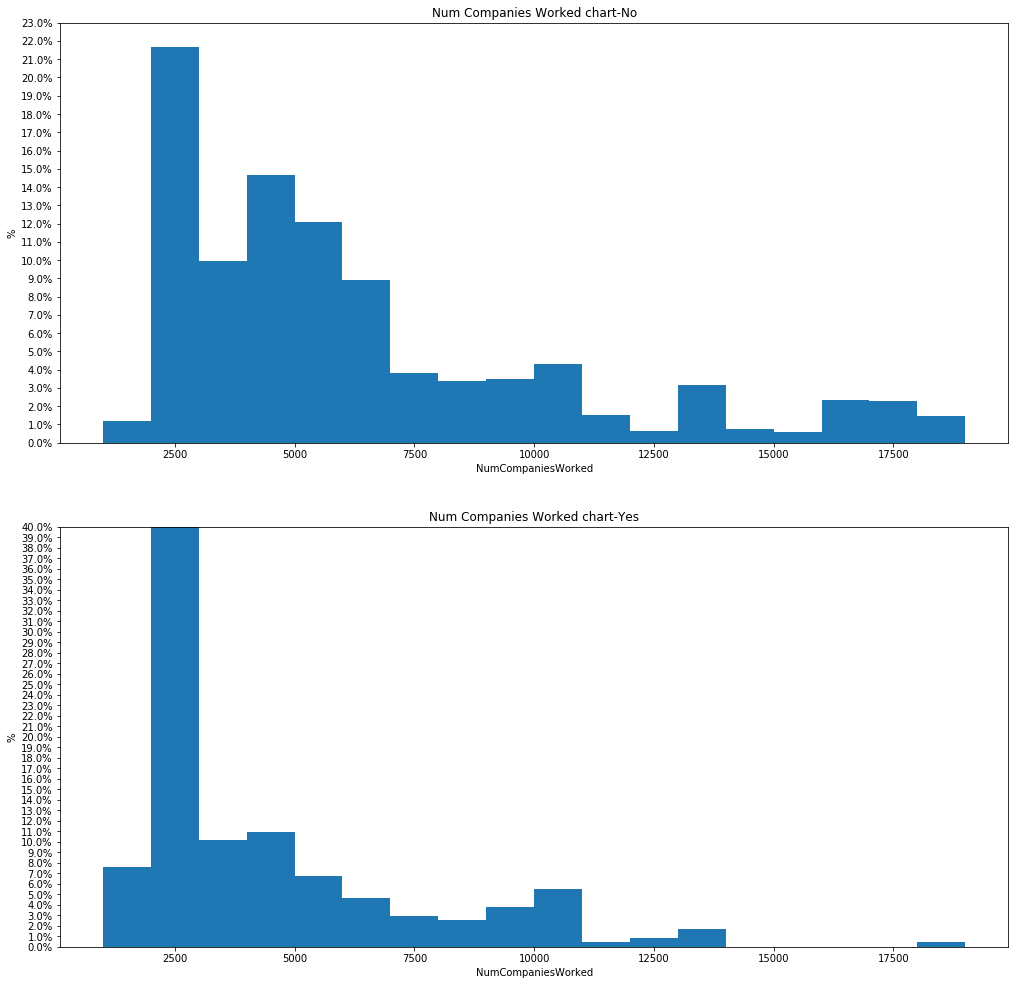

In [96]:
fig, ax = plt.subplots(2,figsize=(17,17))
bins_distance = np.arange(start=1000, stop=20000, step=1000)
width = 0.35  # the width of the bars

y_vals0, x_vals0, e0_ = ax[0].hist(data_f3_attrition0, bins = bins_distance, label=['No'])
ax[0].set_title('Num Companies Worked chart-No')
ax[0].set_xlabel("NumCompaniesWorked")
ax[0].set_ylabel("%")
y_max0 = round((max(y_vals0) / len(data_f3_attrition0)) + 0.01, 2)
ax[0].set_yticks(ticks=np.arange(0.0, y_max0 * len(data_f3_attrition0), 0.01 * len(data_f3_attrition0)))
ax[0].set_ylim(ax[0].get_yticks()[0], ax[0].get_yticks()[-1])
ax[0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data_f3_attrition0)))

y_vals1, x_vals1, e1_ = ax[1].hist(data_f3_attrition1, bins = bins_distance, label=['Yes'])
ax[1].set_title('Num Companies Worked chart-Yes')
ax[1].set_xlabel("NumCompaniesWorked")
ax[1].set_ylabel("%")
y_max1 = round((max(y_vals1) / len(data_f3_attrition1)) + 0.01, 2)
ax[1].set_yticks(ticks=np.arange(0.0, y_max1 * len(data_f3_attrition1), 0.01 * len(data_f3_attrition1)))
ax[1].set_ylim(ax[1].get_yticks()[0], ax[1].get_yticks()[-1])
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data_f3_attrition1)))

plt.show()

# We can see the strange with value from 2500 to 5000 income between yes and no. The weigh focus on 2500 to 5000 of Yes is very large.

# Hypothesis : The monthly income will impact the attrition rate.

<p><strong>H0</strong> : The monthly income don't impact the attrition rate </p>
<strong>H1</strong> : The monthly income impact the attrition rate.


In [49]:
stats.ttest_1samp(data_f3_attrition1, data['MonthlyIncome'].mean())

Ttest_1sampResult(statistic=-7.256448049585389, pvalue=5.693274853957249e-12)

In [50]:
print("T-critical value:", stats.t.ppf(1-(0.05/2), len(data_f3_attrition1)-1))

T-critical value: 1.970066853101121


<B>We can see T-statistic > T-critical (2.4035749150305388 > 1.96189139030643). So we reject H0. The Monthly Income will impact the attrition rate. T-stattic is positive. So the higher employees have attrition rate, the higher salary they are paid.

# 3.4. Education :

In [51]:
data['Education'].head()

0    2
1    1
2    2
3    4
4    1
Name: Education, dtype: int64

In [52]:
data['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [53]:
data['Education'].describe()

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

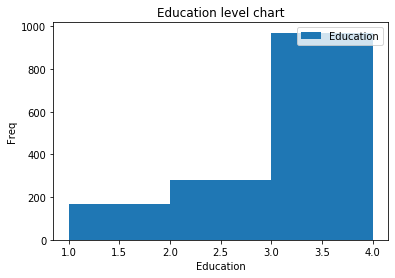

In [54]:
bins_distance = np.arange(start=1, stop=5, step=1)
plt.hist(data['Education'], bins = bins_distance,label=['Education'])
plt.title('Education level chart')
plt.xlabel("Education")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

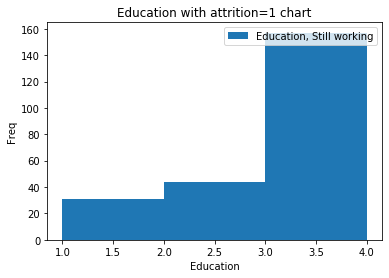

In [88]:
data_f4_attrition1=data[data['Attrition']=='Yes']['Education']
bins_distance = np.arange(start=1, stop=5, step=1)
plt.hist(data_f4_attrition1, bins = bins_distance, label=['Education, Still working'])
plt.title('Education with attrition=1 chart')
plt.xlabel("Education")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

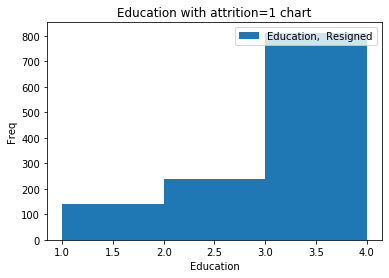

In [89]:
data_f4_attrition0=data[data['Attrition']=='No']['Education']
bins_distance = np.arange(start=1, stop=5, step=1)
plt.hist(data_f4_attrition0, bins = bins_distance, label=['Education,  Resigned'])
plt.title('Education with attrition=1 chart')
plt.xlabel("Education")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

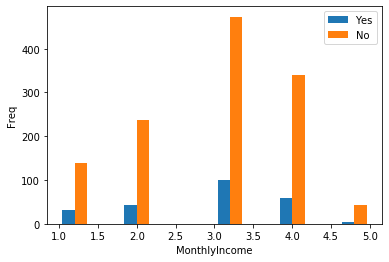

In [90]:
plt.hist([data_f4_attrition1, data_f4_attrition0], label=['Yes', 'No'])
plt.xlabel("MonthlyIncome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show()

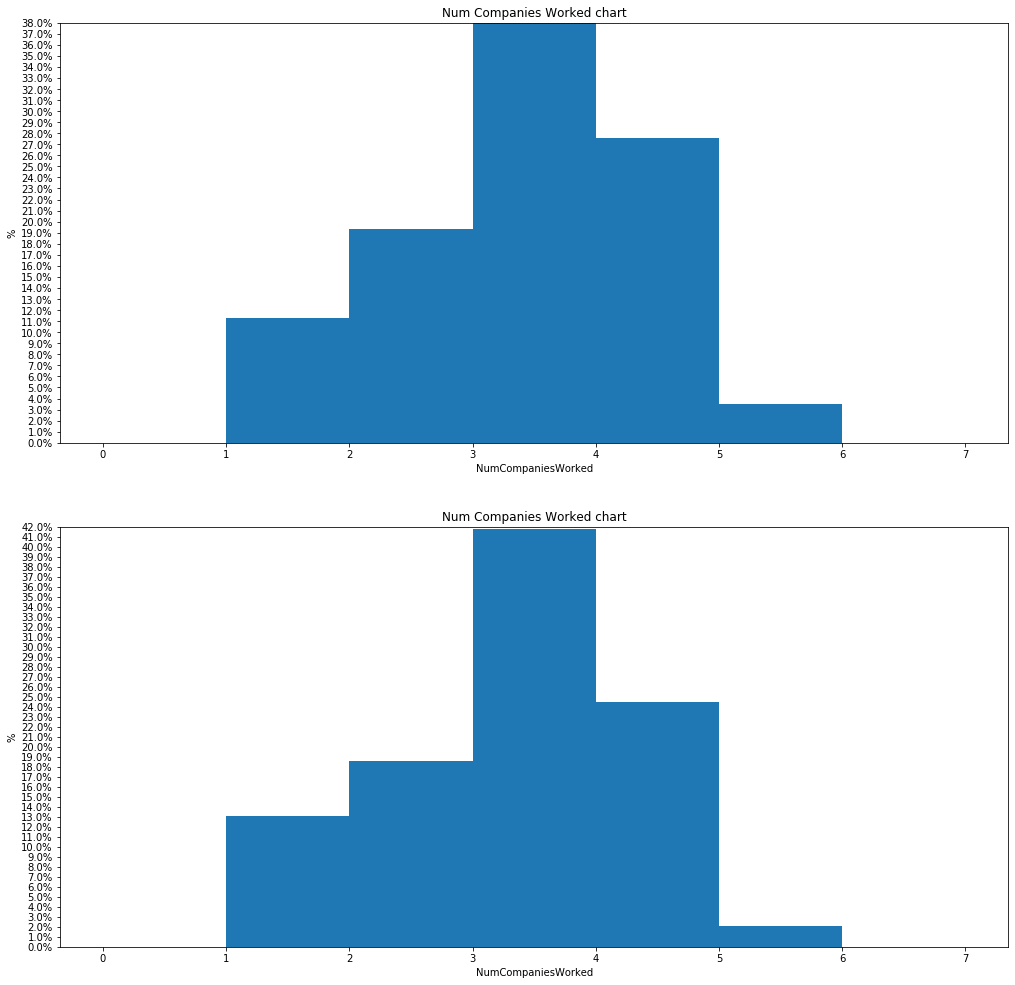

In [92]:
fig, ax = plt.subplots(2,figsize=(17,17))
bins_distance = np.arange(start=0, stop=8, step=1)
width = 0.35  # the width of the bars

y_vals0, x_vals0, e0_ = ax[0].hist(data_f4_attrition0, bins = bins_distance, label=['Yes'])
ax[0].set_title('Num Companies Worked chart')
ax[0].set_xlabel("NumCompaniesWorked")
ax[0].set_ylabel("%")
y_max0 = round((max(y_vals0) / len(data_f4_attrition0)) + 0.01, 2)
ax[0].set_yticks(ticks=np.arange(0.0, y_max0 * len(data_f4_attrition0), 0.01 * len(data_f4_attrition0)))
ax[0].set_ylim(ax[0].get_yticks()[0], ax[0].get_yticks()[-1])
ax[0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data_f4_attrition0)))

y_vals1, x_vals1, e1_ = ax[1].hist(data_f4_attrition1, bins = bins_distance, label=['No'])
ax[1].set_title('Num Companies Worked chart')
ax[1].set_xlabel("NumCompaniesWorked")
ax[1].set_ylabel("%")
y_max1 = round((max(y_vals1) / len(data_f4_attrition1)) + 0.01, 2)
ax[1].set_yticks(ticks=np.arange(0.0, y_max1 * len(data_f4_attrition1), 0.01 * len(data_f4_attrition1)))
ax[1].set_ylim(ax[1].get_yticks()[0], ax[1].get_yticks()[-1])
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data_f4_attrition1)))

plt.show()

# There is no big different between 2 graph.

# Hypothesis : The Education won't impact the attrition rate.

<p><strong>H0</strong> : The education don't impact the attrition rate </p>
<strong>H1</strong> : The education impact the attrition rate.

In [58]:
stats.ttest_1samp(data_f4_attrition1, data['Education'].mean())

Ttest_1sampResult(statistic=-1.1186432672619724, pvalue=0.2644296867320878)

In [59]:
print("T-critical value:", stats.t.ppf(1-(0.05/2), len(data_f4_attrition1)-1))

T-critical value: 1.970066853101121


<B>We can see |T-statistic| < |T-critical| (1.1186432672619724 < 1.970066853101121). So we can not reject H0. The Education don't impact the attrition rate.

# 3.5. Number companies worked :

In [60]:
data['NumCompaniesWorked'].head()

0    8
1    1
2    6
3    1
4    9
Name: NumCompaniesWorked, dtype: int64

In [61]:
data['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [62]:
data['NumCompaniesWorked'].describe()

count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

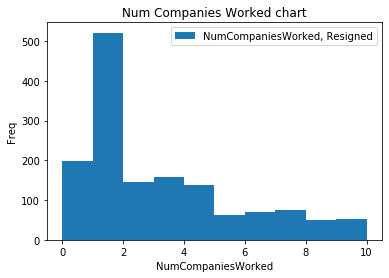

In [74]:
bins_distance = np.arange(start=0, stop=11, step=1)
plt.hist(data['NumCompaniesWorked'], bins = bins_distance,label=['NumCompaniesWorked, Resigned'])
plt.title('Num Companies Worked chart')
plt.xlabel("NumCompaniesWorked")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

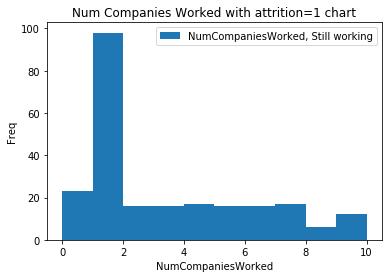

In [76]:
data_f5_attrition1=data[data['Attrition']=='Yes']['NumCompaniesWorked']
bins_distance = np.arange(start=0, stop=11, step=1)
plt.hist(data_f5_attrition1, bins = bins_distance, label=['NumCompaniesWorked, Still working'])
plt.title('Num Companies Worked with attrition=1 chart')
plt.xlabel("NumCompaniesWorked")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

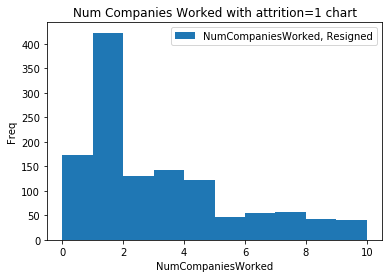

In [78]:
data_f5_attrition0=data[data['Attrition']=='No']['NumCompaniesWorked']
bins_distance = np.arange(start=0, stop=11, step=1)
plt.hist(data_f5_attrition0, bins = bins_distance, label=['NumCompaniesWorked, Resigned'])
plt.title('Num Companies Worked with attrition=1 chart')
plt.xlabel("NumCompaniesWorked")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

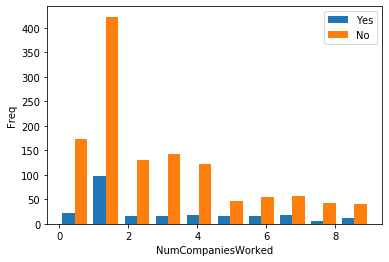

In [85]:
plt.hist([data_f5_attrition1, data_f5_attrition0], label=['Yes', 'No'])
plt.xlabel("NumCompaniesWorked")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show()

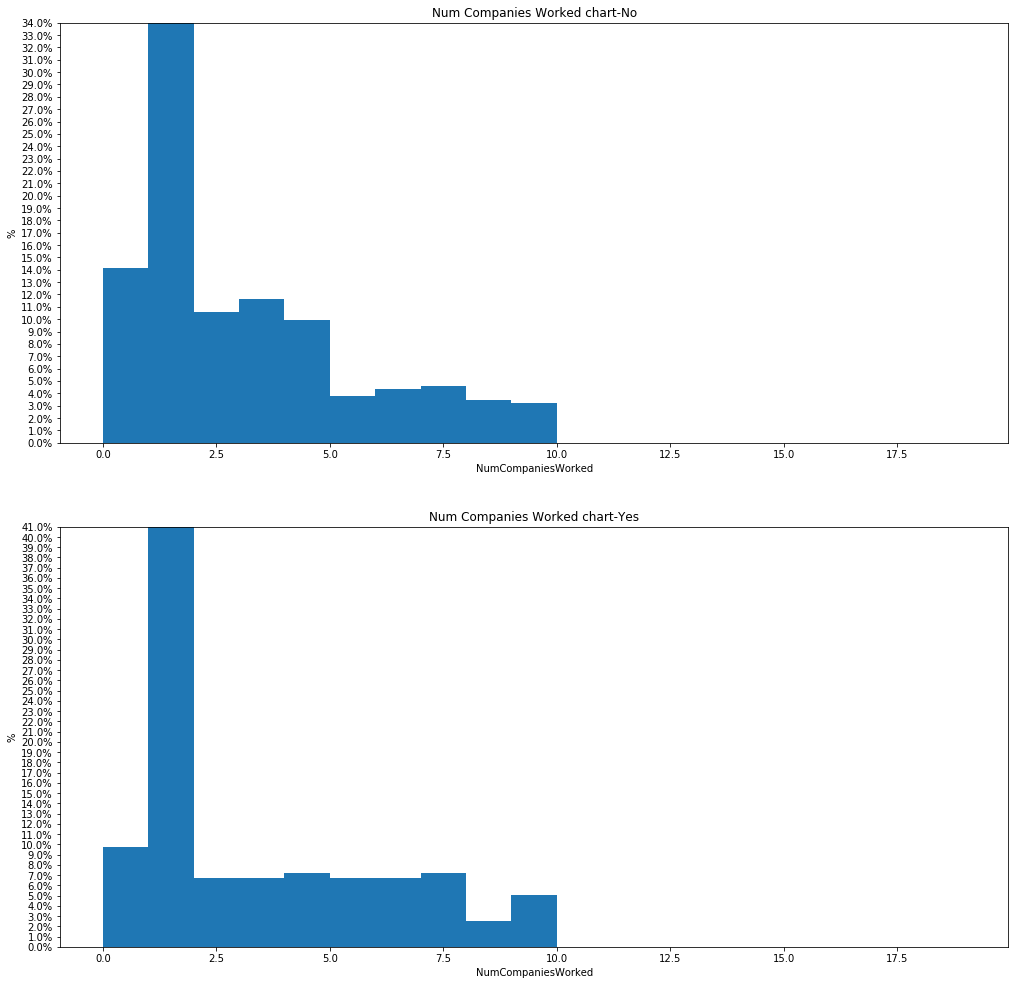

In [86]:
data_f5_attrition0=data[data['Attrition']=='No']['NumCompaniesWorked']
data_f5_attrition1=data[data['Attrition']=='Yes']['NumCompaniesWorked']
fig, ax = plt.subplots(2,figsize=(17,17))
bins_distance = np.arange(start=0, stop=20, step=1)
width = 0.35  # the width of the bars

y_vals0, x_vals0, e0_ = ax[0].hist(data_f5_attrition0, bins = bins_distance, label=['No'])
ax[0].set_title('Num Companies Worked chart-No')
ax[0].set_xlabel("NumCompaniesWorked")
ax[0].set_ylabel("%")
y_max0 = round((max(y_vals0) / len(data_f5_attrition0)) + 0.01, 2)
ax[0].set_yticks(ticks=np.arange(0.0, y_max0 * len(data_f5_attrition0), 0.01 * len(data_f5_attrition0)))
ax[0].set_ylim(ax[0].get_yticks()[0], ax[0].get_yticks()[-1])
ax[0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data_f5_attrition0)))

y_vals1, x_vals1, e1_ = ax[1].hist(data_f5_attrition1, bins = bins_distance, label=['Yes'])
ax[1].set_title('Num Companies Worked chart-Yes')
ax[1].set_xlabel("NumCompaniesWorked")
ax[1].set_ylabel("%")
y_max1 = round((max(y_vals1) / len(data_f5_attrition1)) + 0.01, 2)
ax[1].set_yticks(ticks=np.arange(0.0, y_max1 * len(data_f5_attrition1), 0.01 * len(data_f5_attrition1)))
ax[1].set_ylim(ax[1].get_yticks()[0], ax[1].get_yticks()[-1])
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data_f5_attrition1)))

plt.show()

# No big different points in 2 graph.

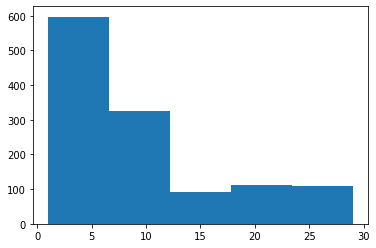

In [66]:
data_f5_attrition0=data[data['Attrition']=='No']['NumCompaniesWorked']
data_f5_attrition1=data[data['Attrition']=='Yes']['NumCompaniesWorked']
fig, ax = plt.subplots()
bins_distance = np.arange(start=0, stop=11, step=1)
y_vals0, x_vals0, e0_ = ax.hist(data_f1_attrition0, bins = 5, label=['NumCompaniesWorked, Resigned'])
plt.show()

# Hypothesis : The Num Companies Worked will impact the attrition rate.

<p><strong>H0</strong> : The Num Companies Worked don't impact the attrition rate </p>
<strong>H1</strong> : The Num Companies Worked impact the attrition rate.

In [67]:
stats.ttest_1samp(data_f5_attrition1, data['NumCompaniesWorked'].mean())

Ttest_1sampResult(statistic=1.4238356021660938, pvalue=0.1558148481629175)

In [68]:
print("T-critical value:", stats.t.ppf(1-(0.05/2), len(data_f5_attrition1)-1))

T-critical value: 1.970066853101121


<B>We can see T-statistic < T-critical (1.4238356021660938 < 1.970066853101121). So we can't reject H0. The Num Companies Worked don't impact the attrition rate.

# Conclution : The key factors which are playing into the current attrition rate are DistanceFromHome, MonthlyIncome, TotalWorkingYears.

# 4. What are key factors that are playing into current satisfaction rates?

# 4.1 Total Working Years

<p><strong>H0</strong> : The Total Working Years don't impact the current satisfaction rate </p>
<strong>H1</strong> : The Total Working Years impact the current satisfaction rate.

In [69]:
mod1=ols('TotalWorkingYears ~ JobSatisfaction',data=data).fit()
aov_table1 = sm.stats.anova_lm(mod1, typ=2)
print(aov_table1)

                       sum_sq      df         F    PR(>F)
JobSatisfaction     36.235052     1.0  0.598362  0.439328
Residual         88897.852703  1468.0       NaN       NaN


# P=0.43 > 0.05 so we can't reject H0.

# 4.2 Num Companies Worked

<p><strong>H0</strong> : The Num Companies Worked don't impact the current satisfaction rate </p>
<strong>H1</strong> : The Num Companies Worked impact the current satisfaction rate.

In [70]:
mod2=ols('NumCompaniesWorked ~ JobSatisfaction',data=data).fit()
aov_table2 = sm.stats.anova_lm(mod2, typ=2)
print(aov_table2)

                      sum_sq      df         F    PR(>F)
JobSatisfaction    28.438798     1.0  4.568535  0.032729
Residual         9138.193175  1468.0       NaN       NaN


# P=0.03 < 0.05 so we can reject H0. NumCompaniesWorked impact the current satisfaction rates.

# 4.3 Distance From Home

<p><strong>H0</strong> : The Distance From Home don't impact the current satisfaction rate </p>
<strong>H1</strong> : The Distance From Homed impact the current satisfaction rate.

In [71]:
mod3=ols('DistanceFromHome ~ JobSatisfaction',data=data).fit()
aov_table3 = sm.stats.anova_lm(mod3, typ=2)
print(aov_table3)

                       sum_sq      df        F    PR(>F)
JobSatisfaction      1.299526     1.0  0.01976  0.888228
Residual         96543.218161  1468.0      NaN       NaN


# P=0.88 > 0.05 so we can't reject H0.

# 4.4 Job Level

<p><strong>H0</strong> : The Job Level don't impact the current satisfaction rate </p>
<strong>H1</strong> : The Job Level impact the current satisfaction rate.

In [72]:
mod4=ols('JobLevel ~ JobSatisfaction',data=data).fit()
aov_table4 = sm.stats.anova_lm(mod4, typ=2)
print(aov_table4)              

                      sum_sq      df         F    PR(>F)
JobSatisfaction     0.006800     1.0  0.005546  0.940645
Residual         1799.982315  1468.0       NaN       NaN


# P=0.94 > 0.05 so we can't reject H0.

# 4.5 Monthly income

<p><strong>H0</strong> : The Monthly income don't impact the current satisfaction rate </p>
<strong>H1</strong> : The Monthly income impact the current satisfaction rate.

In [73]:
mod5=ols('MonthlyIncome ~ JobSatisfaction',data=data).fit()
aov_table5 = sm.stats.anova_lm(mod5, typ=2)
print(aov_table5)             

                       sum_sq      df         F    PR(>F)
JobSatisfaction  1.667698e+06     1.0  0.075193  0.783959
Residual         3.255851e+10  1468.0       NaN       NaN


# P=0.78 >0.05 so we can't reject H0.

# Conclusion : Only Num Companies Worked impact the current satisfaction rate in 5 features that we consider.

# 5. When are employees leaving?

# Employee leaving when  DistanceFromHome is far, MonthlyIncome is low and TotalWorkingYears is long.

<h1 style="color:Green;"> The end ^.^</h1>